Hello student,
I am Hansu Park, TA of the AIP2 course.
This is the announcement for the Final-term project.
In the final-term project, you need to train your CNN model for Artwork-Genre classification problem.

The train and test datasets are here:
test.npy: https://drive.google.com/file/d/1vcsrvU8KNONpUfR4XwfYXmFfyIH8erwM/view?usp=sharing

train.npy: https://drive.google.com/file/d/1IzMtDWxqcCRvzHukV7HMfLpHGBdtmUjy/view?usp=sharing
The skeleton code is available here, so you can start the project from the code:

code.ipynb: https://drive.google.com/file/d/1k5kHld01NUYsgeaiv2p7r5MiHb-nDOGM/view?usp=sharing

To measure your model's accuracy, you need to save your testing result in result.csv/result.zip and submit it to the CodaLab competition link:

https://competitions.codalab.org/competitions/36296?secret_key=597561a0-9263-4cfa-9667-372ea0f96221

(You need to sign up for the competition to login and upload the result)
You need submit the code, result.csv with report files in the blackboard system.
Please refer the google document below for more detailed explanation:

https://docs.google.com/presentation/d/10hucg6zBha_2tz0Dk2QTGitgg1VO7Kdj/edit?usp=sharing&ouid=108779554631549358570&rtpof=true&sd=true

We will also provide the tutorial session on the final-term project on the lab sessions (11/24, 25) next week.
Three TA lists are as below:
Hansu Park      hansupark@unist.ac.kr
Dahye Jang      sweety9764@unist.ac.kr
Jounghyun Kim   maxedset@unist.ac.kr
Please also use the `Final project Q&A board' of the blackboard to ask related questions.
Best wishes,
TAs

submit link: 
https://competitions.codalab.org/competitions/36296?secret_key=597561a0-9263-4cfa-9667-372ea0f96221

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm, tqdm_notebook
import tensorflow as tf
from sklearn.model_selection import train_test_split

from glob import glob
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *

In [2]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
## PLEASE MODIFY THIS ##

#Train Method

#Upload train dataset
train_dataset_path = '/content/gdrive/MyDrive/AIP2/final/train.npy' #Type your train dataset path. Check your own dataset path before typing it. /// ex) /content/gdrive/Mydrive/homeworks/AIP2/train.npy
test_dataset_path = '/content/gdrive/MyDrive/AIP2/final/test.npy' #Type your test dataset path. Check your own dataset path before typing it. /// ex) /content/gdrive/Mydrive/homeworks/AIP2/test.npy
#You can refer the tutorial ppt if you want to know more details about this

In [4]:
valid_ratio = 0.2 # Type the ratio for splition train data into train and valid. /// ex) the number of data = 100, valid_ratio = 0.2 --> the number of train data = 80, the number of valid data = 20 
batch_size = 100 #Type your own batch size
n_epoch = 80 #Type your Own Epoch num

In [5]:
train_np_data = np.load(train_dataset_path, allow_pickle=True) #Upload train data. train_np_data consists of img(data) and label(target). 
data, target = train_np_data.item().get('data'), train_np_data.item().get('target') #Get img data(data) and label(target) from train_np_data. 

#Explore the dataset
print(f"total number of img data : {data.shape[0]}") 
print(f"total number of label data : {target.shape[0]}")

sample_data, sample_target = data[0], target[0]
print(sample_data.shape) # (64, 64, 3) --> img size is 64 x 64 and its type is RGB image(3 channel).
print(sample_target.shape) # (13, ) --> one-hot encoding for label. /// ex)  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] --> the solution label is the 4th label.

X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size = valid_ratio) # Split train data into train and valid according to the split ratio.

total number of img data : 4573
total number of label data : 4573
(64, 64, 3)
(13,)


Genre : Romanticism


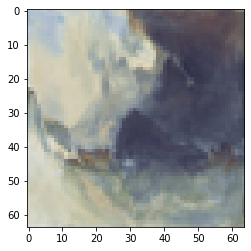

In [6]:
#Visualize the image sample
%matplotlib inline

genre_dict = {'0': 'Symbolism', '1': 'High Renaissance', '2': 'Post-Impressionism', '3': 'Pop Art', '4': 'Impressionism', '5': 'Northern Renaissance', '6': 'Surrealism', 
         '7': 'Expressionism', '8': 'Romanticism', '9': 'Early Renaissance', '10': 'Baroque', '11': 'Cubism', '12': 'Primitivism'} # Dictionary used for converting one-hot encoding to genre name.

img_order = 3333 # You can select any image you want by changing the variable 'img_order'.
sample_data = data[img_order] #Get the image in data. 
sample_data = sample_data.astype(np.int)
sample_target = target[img_order] #Get the target about the selected image. it is the state of one-hot encoding.
sample_genre = genre_dict[str(np.argmax(sample_target))] #Convert one-hot encoding to genre name

print(f"Genre : {sample_genre}")
plt.imshow(sample_data) 

In [7]:
STEP_SIZE_TRAIN = X_train.shape[0]//batch_size
STEP_SIZE_VALID = X_valid.shape[0]//batch_size

print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Total number of batches = 36 and 9


In [8]:
from tensorflow.python.framework.test_util import device
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at : {}'.format(device_name))

SystemError: ignored

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
                            keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias = False),
                            keras.layers.BatchNormalization(),
                            self.activation,
                            keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),
                            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                                keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),
                                keras.layers.BatchNormalization()]
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
                skip_Z = layer(skip_Z)
        return self.activation(Z+skip_Z)

In [12]:
## PLEASE MODIFY THIS ##

# Complie your model
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, 7, strides = 2, input_shape = [64,64,3], padding = "same", use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size = 3, strides = 2, padding = "same"))

prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filter == prev_filters else 2
    model.add(ResidualUnit(filters, strides = strides))
    prev_filters = filters

model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(13, activation = "softmax"))

In [ ]:
# Training
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = n_epoch, batch_size=batch_size, validation_data=(X_valid, y_valid)) 

Epoch 1/80
37/37 [==============================] - 218s 6s/step - loss: 2.3911 - accuracy: 0.2676 - val_loss: 2.2976 - val_accuracy: 0.2678
Epoch 2/80
37/37 [==============================] - 203s 5s/step - loss: 1.9932 - accuracy: 0.3494 - val_loss: 2.2399 - val_accuracy: 0.2678
Epoch 3/80
37/37 [==============================] - 202s 5s/step - loss: 1.9167 - accuracy: 0.3589 - val_loss: 2.2617 - val_accuracy: 0.2678
Epoch 4/80
37/37 [==============================] - 201s 5s/step - loss: 1.8379 - accuracy: 0.3945 - val_loss: 2.3273 - val_accuracy: 0.2678
Epoch 5/80
37/37 [==============================] - 202s 5s/step - loss: 1.7806 - accuracy: 0.4136 - val_loss: 2.3593 - val_accuracy: 0.2120
Epoch 6/80
37/37 [==============================] - 202s 5s/step - loss: 1.7007 - accuracy: 0.4349 - val_loss: 2.2596 - val_accuracy: 0.2721
Epoch 7/80
37/37 [==============================] - 201s 5s/step - loss: 1.7004 - accuracy: 0.4420 - val_loss: 2.1773 - val_accuracy: 0.2852
Epoch 8/80
37

In [ ]:
### Test method ###

test_np_data = np.load(test_dataset_path, allow_pickle=True) #Upload test data. test_np_data consists of img(data) and img name(name).
data, name = test_np_data.item().get('data'), test_np_data.item().get('name') ##Get img data(data) and name from test_np_data.
#name will be used for creating result.csv file. So, Consider only data.

#Explore the dataset
print(f"total number of img data : {data.shape[0]}") 
print(f"shape of img : {data.shape[1:]}")

In [ ]:
# Example of model prediction
output = model.predict(data) #Predict the result with your trained model.
output = np.argmax(output, axis = -1) #Convert one-hot encoding to label
print(output)

In [ ]:
# Save your result to csv file.
data = {
    'img' : name,
    'predictions' : output
}

# You should submit the saved `result.csv' to the codalab.

def _key(_str): #extract the order from img_name 
  # print(_str)
  str2int = int(_str.split('_')[1].split('.')[0])
  return str2int
  
output_df = pd.DataFrame(data) # Create dataframe 
output_df['order'] = output_df['img'].apply(_key) #the 'order' column is used for sorting output in descending order.
output_df = output_df.sort_values(by = 'order')
output_df = output_df[['img', 'predictions']].reset_index(drop = True) #Extract colunms necessary to evaluate in Codalab.

output_df.to_csv('result.csv') 